# randomizer

The following `randomizer` class may look familiar to you. Below is its definition, followed by three examples of its use.

Scan through this example, then continue on with the challenge. Don't bother trying to comprehend every line of the randomizer code,
but make an effort to understand what each function creates based on its arguments, from the examples.

Generate randomized datasets:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
####################
# randomizer
####################
class randomizer():
    def randomlinear(self,numberofpoints=10,slope=1/2,noise=1.0):
      x = np.arange(0,numberofpoints)
      noisex = np.random.random(numberofpoints)*noise
      noisey = np.random.random(numberofpoints)*noise
      y = ((x+noisex*0.5)*slope)+noisey
      x = x/(np.random.random(1)/10)
      y = y/(np.random.random(1)/10)
      permutation = np.random.permutation(numberofpoints)
      return pd.DataFrame([x[permutation],y[permutation]])

    def randompolynomial(self,numberofpoints=10,degree=2,noise=3.0):
      x = np.arange(0,numberofpoints)
      noisex = np.random.random(numberofpoints)*noise
      noisey = np.random.random(numberofpoints)*noise
      y = ((x+noisex)**degree)+noisey
      x = x/(np.random.random(1)/10)
      y = y/(np.random.random(1)/10)
      permutation = np.random.permutation(numberofpoints)
      return pd.DataFrame([x[permutation],y[permutation]])

    def randomnormal(self,numberofpoints=10,mean=[0,0],cov=[[1,0],[0,1]]):
      return pd.DataFrame(np.random.multivariate_normal(mean, cov, numberofpoints).T)
randomizer = randomizer()

## randomizer.randomlinear

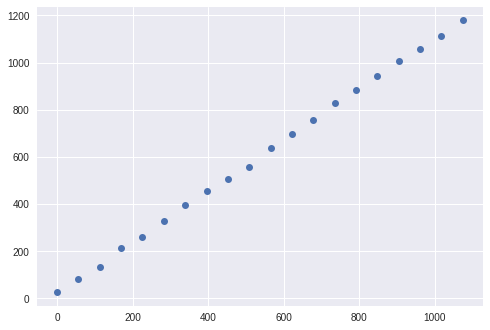

In [0]:
data = randomizer.randomlinear(numberofpoints=20,slope=3)
plt.plot(data.iloc[0,:],data.iloc[1,:],'o')

## randomizer.randompolynomial

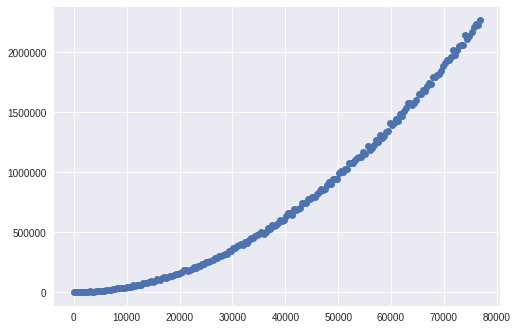

In [0]:
data = randomizer.randompolynomial(numberofpoints=200)
plt.plot(data.iloc[0,:],data.iloc[1,:],'o')

## randomizer.randomnormal

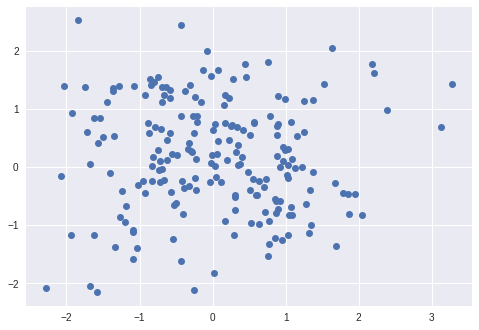

In [0]:
data = randomizer.randomnormal(numberofpoints=200,mean=[0,0],cov=[[1,0],[0,1]])
plt.plot(data.iloc[0,:],data.iloc[1,:],'o')

# Coding Challenge

Use `randomizer` to create three datasets:

* two normal distributions $a$ and $b$
* a linear or polynomial dataset $s$ that draws a line between $a$ and $b$ such that all $a$ are one one side of $s$ and all $b$ are on the other.

The primary concerns here are the `mean` of the normal distributions as this determines their centroid, where the points are located, and the slope and noise of the line $s$ that separates them. You can change the $y$ intercept of $s$ simply by adding [0,1]*b to it.

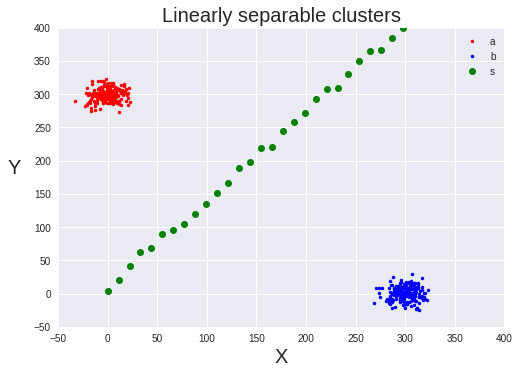

In [0]:
# Create your datasets here and plot them.
a = randomizer.randomnormal(numberofpoints=200,mean=[0,300],cov=[[100,0],[0,100]])

b = randomizer.randomnormal(numberofpoints=200,mean=[300,0],cov=[[100,0],[0,100]])

s = randomizer.randomlinear(numberofpoints=2000,slope=1)

plt.xlim(-50,400)
plt.ylim(-50,400)
plt.plot(a.iloc[0,:], a.iloc[1,:],'.r', b.iloc[0,:], b.iloc[1,:],'.b', s.iloc[0,:], s.iloc[1,:], 'og');
plt.title('Linearly separable clusters', fontsize=20);
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20, rotation = 0, labelpad=20)
plt.legend(labels=['a', 'b', 's'], loc=0);

# Coding Challenge Part 2

Now that you've plotted two sets of data (or clusters) and a line that perfectly separates them, create two new sets of data that can't be perfectly separated.
The `cov` matrix to `randomnormal` determines how large the cloud of points is. If the two point clouds overlap, no linear function and most likely no polynomial function can separate them.

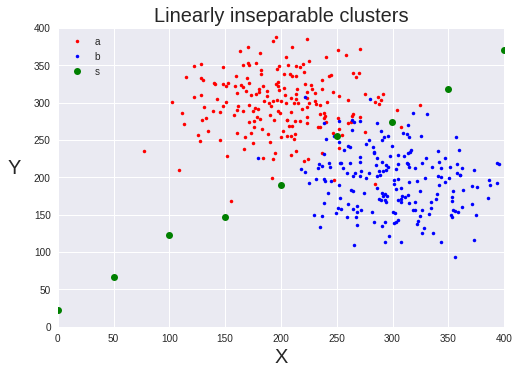

In [0]:
# Create two datasets that can't be perfectly separated. Draw a line using randomlinear or randompolynomial that makes a best-attempt at separating them.

a = randomizer.randomnormal(numberofpoints=200,mean=[200,300],cov=[[2000,0],[0,2000]])

b = randomizer.randomnormal(numberofpoints=200,mean=[300,200],cov=[[2000,0],[0,2000]])

s = randomizer.randomlinear(numberofpoints=2000,slope=1)

plt.xlim(0,400)
plt.ylim(0,400)
plt.plot(a.iloc[0,:], a.iloc[1,:],'.r', b.iloc[0,:], b.iloc[1,:],'.b', s.iloc[0,:], s.iloc[1,:], 'og');
plt.title('Linearly inseparable clusters', fontsize=20);
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20, rotation = 0, labelpad=20)
plt.legend(labels=['a', 'b', 's'], loc=0);